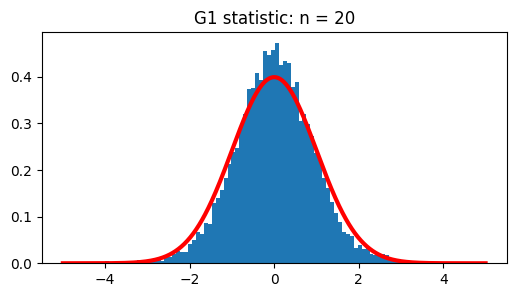

In [ ]:
# compute skewness
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm

# generate data from a normal distribution for skewness
N = 10000 # number of samples
n = 20 # sample size
x = np.random.normal(0, 1, (N, n))  # 生成 N rows n columns 的数据
G1 = np.sqrt(n / 6) * skew(x, axis = 1, bias = True) # compute skewness for each row, axis = 1 表示对每一行计算 skewness

fig = plt.figure(figsize = (6, 3))
plt.hist(G1, bins = 100, density = True)
plt.title('G1 statistic: n = {}'.format(n))
# draw the normal distribution
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y, linewidth = 3, color = 'r', label = 'Z distribution')
plt.show()
# print('skewness:', s)

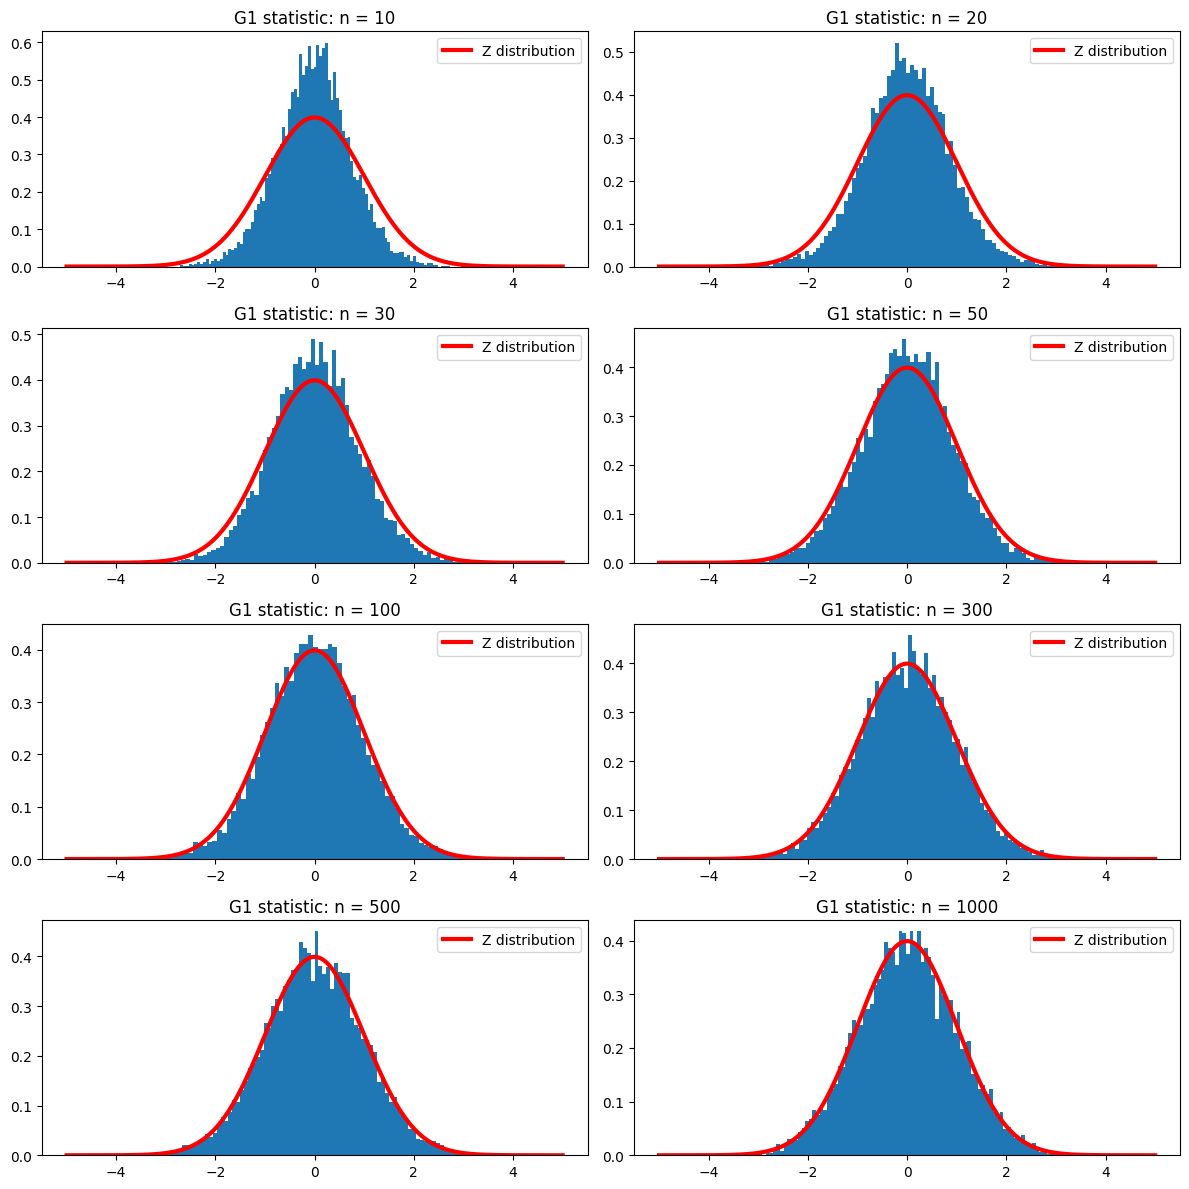

In [43]:
# compute skewness
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm

# generate data from a normal distribution for skewness
N = 10000 # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000] # sample size
G1 = np.zeros((N, len(n)))

# draw subplots for different sample sizes, layout 4x2
fig = plt.figure(figsize = (12, 12))
for i in range(len(n)):
    x = np.random.normal(0, 1, (N, n[i]))  # 生成 N rows n columns 的数据
    G1 = np.sqrt(n[i] / 6) * skew(x, axis = 1, bias = True) # compute skewness for each row
    plt.subplot(4, 2, i + 1)
    plt.hist(G1, bins = 100, density = True)
    plt.title('G1 statistic: n = {}'.format(n[i]))
    # draw the normal distribution
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x, 0, 1)
    plt.plot(x, y, linewidth = 3, color = 'r', label = 'Z distribution')
    plt.legend()

plt.tight_layout()
plt.show()

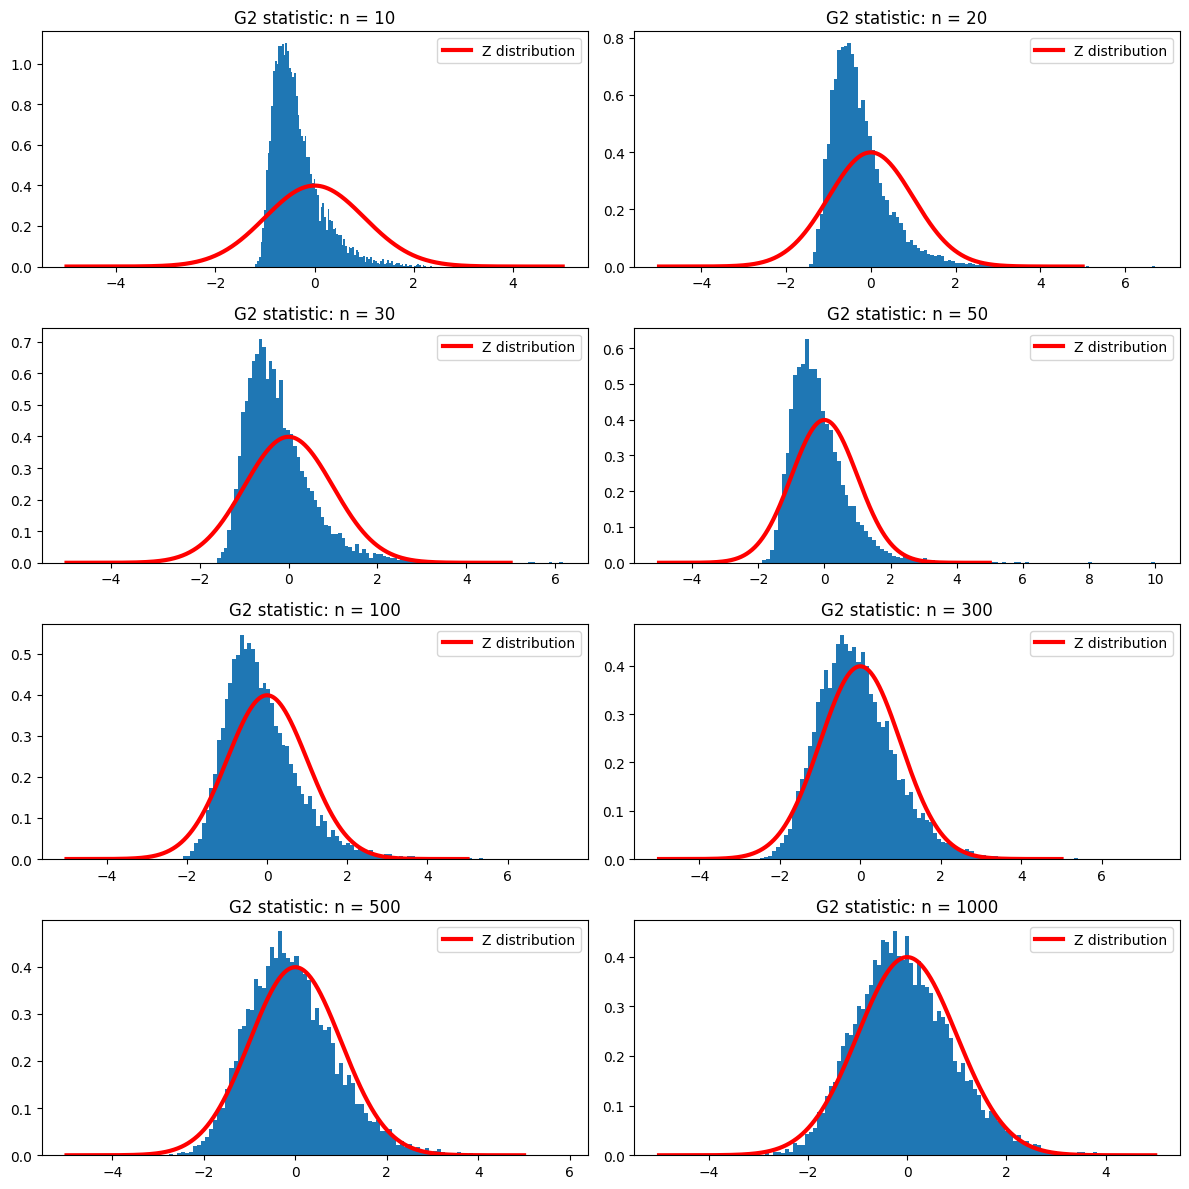

In [44]:
# compute kurtosis
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import norm

# generate data from a normal distribution for skewness
N = 10000 # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000] # sample size
G2 = np.zeros((N, len(n)))

# draw subplots for different sample sizes, layout 4x2
fig = plt.figure(figsize = (12, 12))
for i in range(len(n)):
    x = np.random.normal(0, 1, (N, n[i]))  # 生成 N rows n columns 的数据
    # G2 = np.sqrt(n[i] / 24) * (kurtosis(x, axis = 1, bias = True, fisher = False) - 3)
    G2 = np.sqrt(n[i] / 24) * (kurtosis(x, axis = 1, bias = True, fisher = True))
    plt.subplot(4, 2, i + 1)
    plt.hist(G2, bins = 100, density = True)
    plt.title('G2 statistic: n = {}'.format(n[i]))
    # draw the normal distribution
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x, 0, 1)
    plt.plot(x, y, linewidth = 3, color = 'r', label = 'Z distribution')
    plt.legend()

plt.tight_layout()
plt.show()

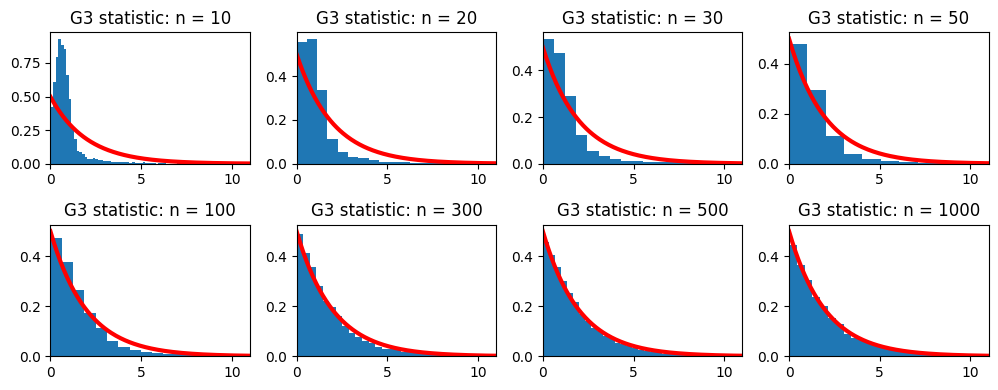

In [53]:
# compute kurtosis
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import norm, chi2

# generate data from a normal distribution for skewness
N = 10000 # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000] # sample size
G3 = np.zeros((N, len(n)))

# draw subplots for different sample sizes, layout 4x2
fig = plt.figure(figsize = (10, 4))
for i in range(len(n)):
    x = np.random.normal(0, 1, (N, n[i]))  # 生成 N rows n columns 的数据
    s = skew(x, axis = 1, bias = True)
    k = kurtosis(x, axis = 1, bias = True, fisher = True)
    G3 = (n[i] / 6) * ((s ** 2) + ((k ** 2) / 4))

    plt.subplot(2, 4, i + 1)
    plt.hist(G3, bins = 100, density = True)
    plt.title('G3 statistic: n = {}'.format(n[i]))
    # draw the normal distribution
    x = np.linspace(min(G3), max(G3), 1000)
    y = chi2.pdf(x, 2)
    plt.plot(x, y, linewidth = 3, color = 'r', label = 'Chisq(2) distribution')
    plt.xlim([0, 11])
    # plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# compute kurtosis
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera
from scipy.stats import norm, chi2

# generate data from a normal distribution for skewness
n = 100 # number of samples
# n = [10, 20, 30, 50, 100, 300, 500, 1000] # sample size
# G3 = np.zeros((N, len(n)))
x = np.random.normal(0, 1, n)  # 生成 N rows n columns 的数据
stats, p_value = jarque_bera(x)
s = skew(x, bias = True)
k = kurtosis(x, bias = True, fisher = True)
G3 = (n / 6) * ((s ** 2) + ((k ** 2) / 4))
p_val = 1 - chi2.cdf(G3, 2)
print('Jb test:', stats, 'P_value:', p_value)
print('G3 statistic:', G3, 'P_value:', p_val)

Jb test: 2.746058719502434 P_value: 0.2533383429529236
G3 statistic: 2.746058719502434 P_value: 0.2533383429529237


In [7]:
# compute kurtosis
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera
from scipy.stats import norm, chi2

# generate data from a normal distribution for skewness
N = 50000 # number of samples
n = 50 # sample size
# G3 = np.zeros((N, len(n)))
alpha = 0.05

x = norm.rvs(loc = 0, scale = 1, size = (N, n))  # 生成 N rows n columns 的数据

Stats, P_Val = jarque_bera(x, axis = 1)
power = np.mean(P_Val < alpha)

print('Power:', power)

Power: 0.03664


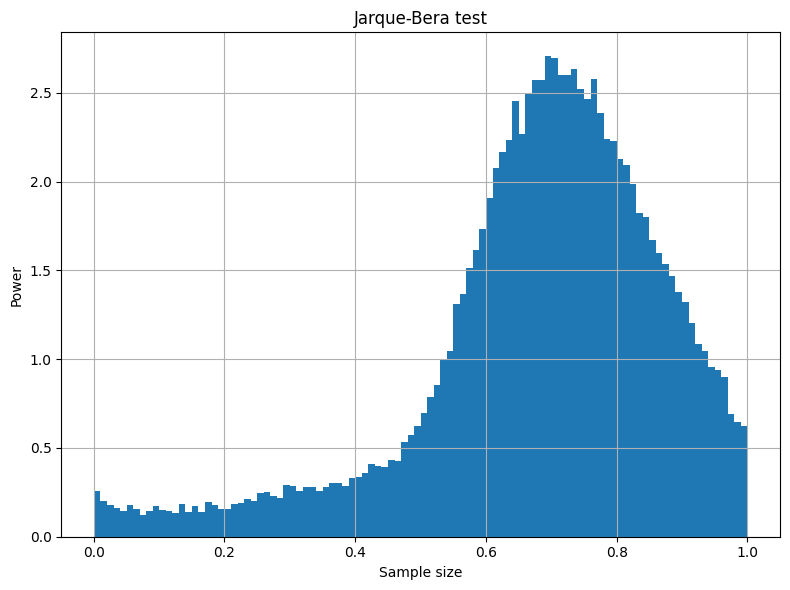

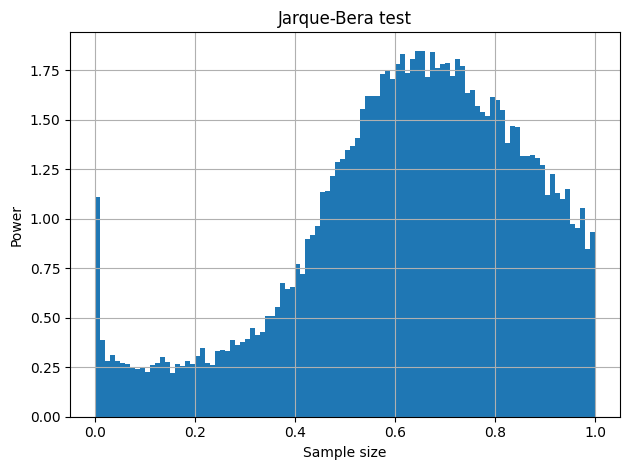

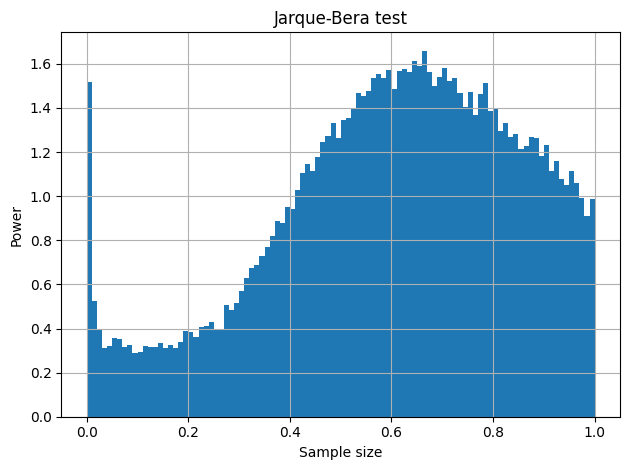

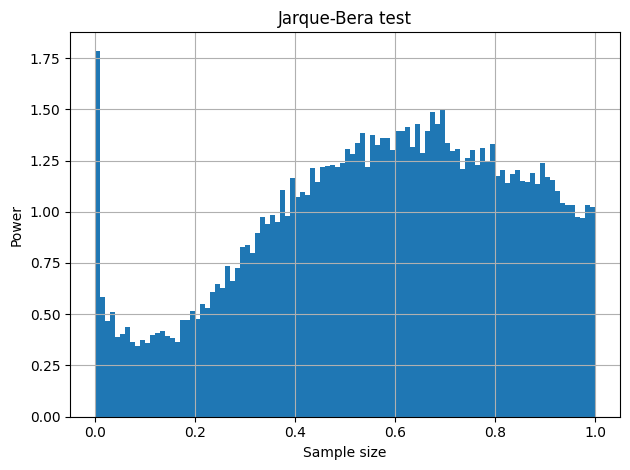

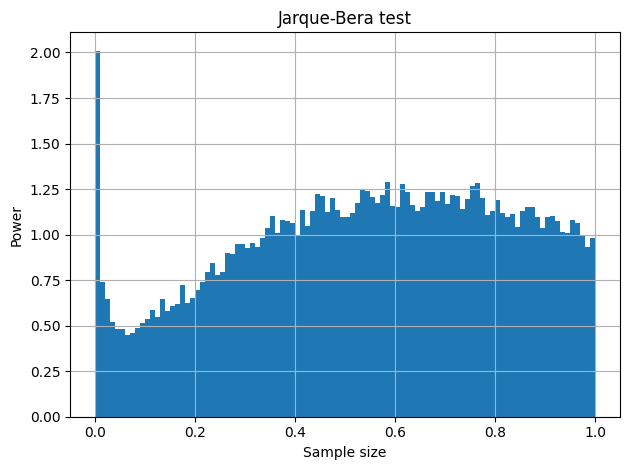

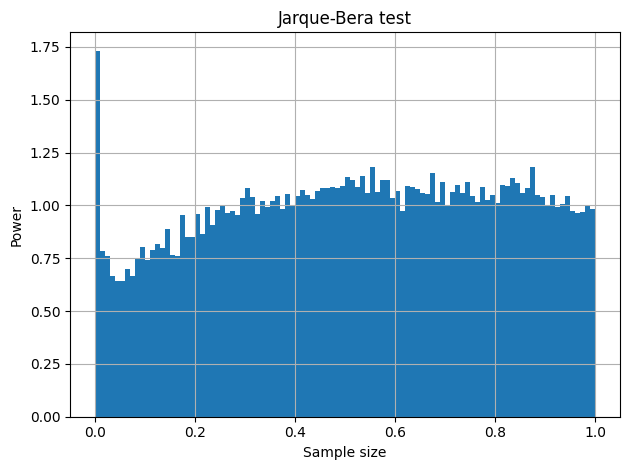

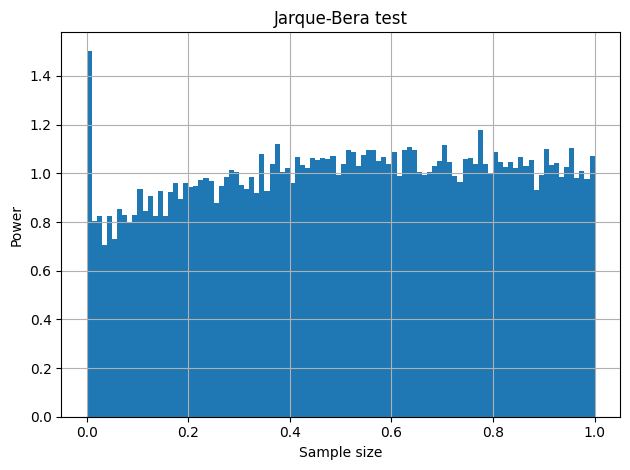

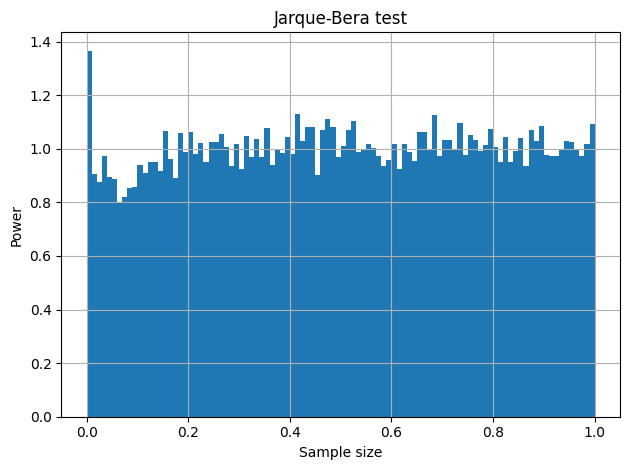

In [4]:
# compute kurtosis
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera
from scipy.stats import norm, chi2, t

# generate data from a normal distribution for skewness
N = 50000 # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000] # sample size
# G3 = np.zeros((N, len(n)))
alpha = 0.05

fig = plt.figure(figsize = (8, 6))
power = np.zeros(len(n))
for i in range(len(n)):
    x = norm.rvs(loc = 0, scale = 1, size = (N, n[i]))  # 生成 N rows n columns 的数据
    # x = t.rvs(df = 3, size = (N, n[i]))
    Stats, P_Val = jarque_bera(x, axis = 1)
    # power[i] = np.mean(P_Val < alpha)

    plt.hist(P_Val, bins = 100, density = True)
    plt.xlabel('Sample size')
    plt.ylabel('Power')
    plt.title('Jarque-Bera test')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

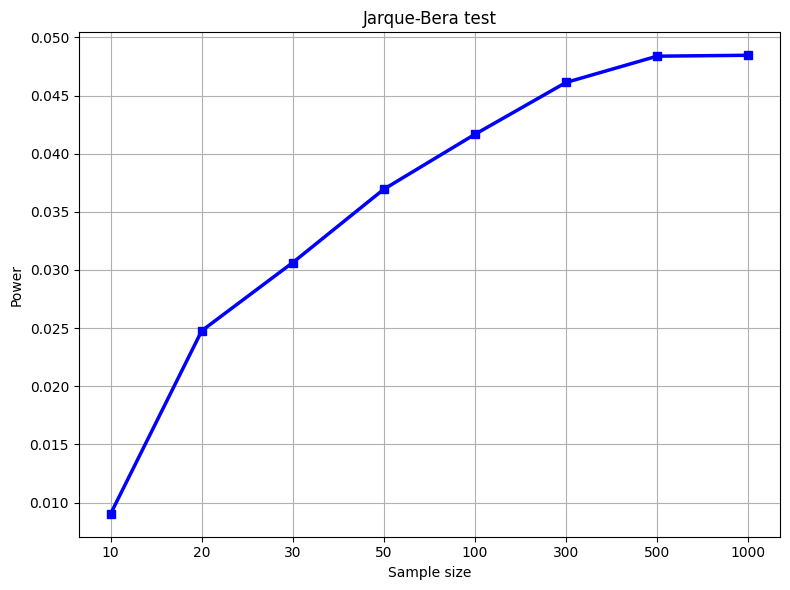

In [18]:
# compute kurtosis
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera
from scipy.stats import norm, chi2, t

# generate data from a normal distribution for skewness
N = 100000 # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000] # sample size
# G3 = np.zeros((N, len(n)))
alpha = 0.05

power = np.zeros(len(n))
for i in range(len(n)):
    x = norm.rvs(loc = 0, scale = 1, size = (N, n[i]))  # 生成 N rows n columns 的数据
    # x = t.rvs(df = 3, size = (N, n[i]))
    Stats, P_Val = jarque_bera(x, axis = 1)
    power[i] = np.mean(P_Val < alpha)

fig = plt.figure(figsize = (8, 6))
plt.plot(power, marker = 's', linestyle = '-', color = 'b', lw = 2.5)
plt.xticks(np.arange(len(n)), labels = n)
plt.xlabel('Sample size')
plt.ylabel('Power')
plt.title('Jarque-Bera test')
plt.grid(True)

plt.tight_layout()
plt.show()

In [4]:
print('Power:', power)

Power: [0. 0. 0. 0. 0. 0. 0. 0.]
